In [2]:
## Setup, dependencies, inspection
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup (imported os so that it would be here if I need to adjust the commands to work later)
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

#(each of the following initially run in new cell to show outputs)
# Get the columns and the rows that are not null.
city_data_df.count()
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()
# Get the data types of each column.
city_data_df.dtypes
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

# Get the columns and the rows that are not null.
ride_data_df.count()
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()
# Get the data types of each column.
ride_data_df.dtypes

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


In [3]:
## Create metrics for the bubble chart for ride-sharing data
# Create the city type dataframes.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the number of rides for each city by type
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Get the average fare for each city by type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Get the number of drivers for each city by type (I'm not sure why we use the average for this but I assume it has
# something to do with the the fact that we merged the df's to include the number of available drivers in each city
# in every ride_id record. I personally would have excised that from the dataframe and then just used the original
# city_data_df to retrieve this information. Perhaps it needs to be a measure in the df to be used with the plot?)
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

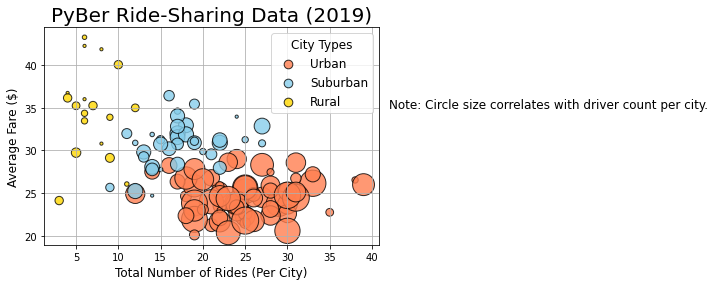

In [4]:
## Construct Bubble Chart
# Build Urban Cities
plt.scatter(urban_ride_count, urban_avg_fare,
            s=10*urban_driver_count,
            c="coral", ec="k",
            linewidths=1,
            alpha=0.8,
           label="Urban")

# Build Suburban Cities
plt.scatter(suburban_ride_count, suburban_avg_fare,
           s=10*suburban_driver_count,
           c="skyblue", ec="k",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

# Build Rural Cities
plt.scatter(rural_ride_count, rural_avg_fare,
            s=10*rural_driver_count,
            c="gold", ec="k",
            linewidths=1,
            alpha=0.8, 
            label="Rural")

# Add chart elements
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Make uniform formatting for the legend by creating a variable and adding additional parameters for text font size,
# legend display (mode), number of scatterpoints for each marker, location of the legend, and the title.
lgnd = plt.legend(fontsize="12", mode="expanded",
                 scatterpoints=1, loc="best", title="City Types")

# Use handles to set the font size of the marker in a legend to a fixed size
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Increase the fontsize of the legend title to 12
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size. 42 put the note to the right of the chart and 35 puts it a bit over 
# halfway up the side. Think X and Y coords
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [22]:
## Summary Statistics for fares by city type
# Get the fares for each type of city
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
# Calculate using the NumPy mean and median and the SciPy stats mode
# Urban
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

# Suburban
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${mean_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

# Rural
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.97.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [29]:
## Summary Statistics for Drivers by City Type 
# Get the driver count data from each city type 
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

# Calculate using NumPy and SciPy.statistics
#Urban
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers:.0f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers:.0f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode of the number of drivers in urban areas is {mode_urban_drivers}.")

# Suburban
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers in suburban areas is {mean_suburban_drivers:.0f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban areas is {median_suburban_drivers:.0f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode of the number of drivers in suburban areas is {mode_suburban_drivers}.")

# Rural
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in rural areas is {mean_rural_drivers:.0f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in rural areas is {median_rural_drivers:.0f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode of the number of drivers in rural areas is {mode_rural_drivers}.")

The mean number of drivers in urban cities is 37.
The median number of drivers in urban cities is 37.
The mode of the number of drivers in urban areas is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean number of drivers in suburban areas is 14.
The median number of drivers in suburban areas is 16.
The mode of the number of drivers in suburban areas is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean number of drivers in rural areas is 4.
The median number of drivers in rural areas is 4.
The mode of the number of drivers in rural areas is ModeResult(mode=array([1], dtype=int64), count=array([32])).


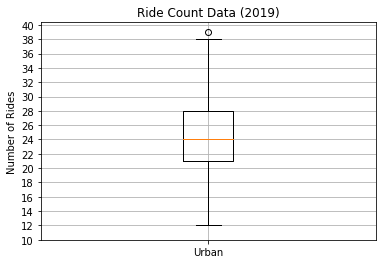

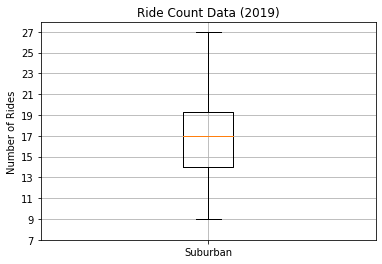

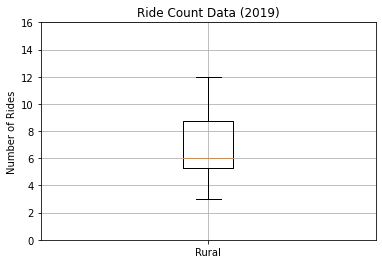

In [36]:
## Box and Whisker Plots
# Create a box-and-whisker plot for the urban cities ride count.
urban_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=urban_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

# Create a box-and-whisker plot for the urban cities ride count.
suburban_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=suburban_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(7, 29, step=2.0))
ax.grid()
plt.show()

# Create a box-and-whisker plot for the urban cities ride count.
rural_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=rural_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 18, step=2.0))
ax.grid()
plt.show()

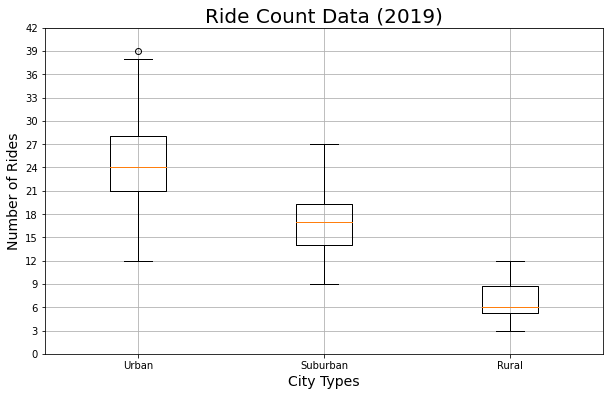

In [38]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [39]:
# Determine outlier city with 39 rides
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


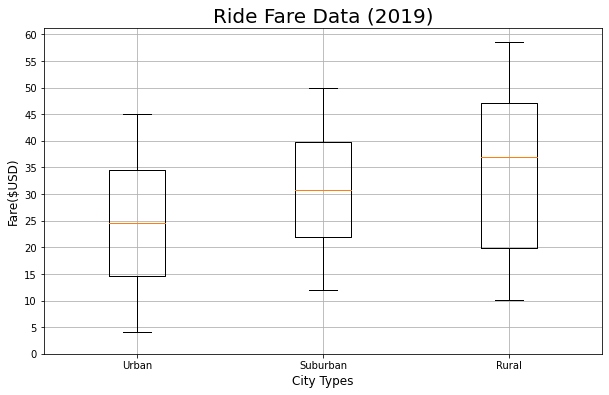

<Figure size 432x288 with 0 Axes>

In [45]:
# Create a box-and-whisker plot for the fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=12)
ax.set_xlabel('City Types', fontsize=12)
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.show()
# Save the figure.
plt.savefig("analysis/Fig3.png")

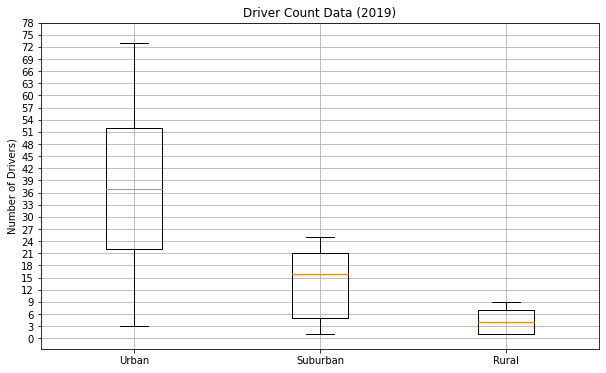

<Figure size 432x288 with 0 Axes>

In [52]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban","Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 80, step=3.0))
ax.grid()
plt.show()
# Save the figure.
plt.savefig("analysis/Fig4.png")

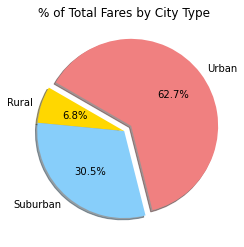

In [60]:
## Create Pie charts to show overall percentages 
# Sum of fares for each type of city
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

# Sum total fares
total_fares = pyber_data_df["fare"].sum()

# Calculate percetage of fare for each city type 
type_percents = 100 * sum_fares_by_type/total_fares

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
plt.savefig("/analysis/Fig5.pngplt.show()
